Ensure latest version of package is installed

- https://github.com/weiaicunzai/pytorch-cifar100

In [2]:
# import torch
# torch.cuda.is_available()

True

In [10]:
%pip install sas-pip/

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sas-pip (from versions: none)
ERROR: No matching distribution found for sas-pip


Load Data

In [1]:
import torchvision.transforms as transforms
mean = (0.5070751592371323, 0.48654887331495095, 0.4409178433670343)
std = (0.2673342858792401, 0.2564384629170883, 0.27615047132568404)
transform_train = transforms.Compose([
        #transforms.ToPILImage(),
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

In [2]:
import torchvision
from torchvision import transforms

cifar100 = torchvision.datasets.CIFAR100("./data/cifar100/", transform=transform_train,download=True)
device = "cuda:0"

Files already downloaded and verified


In [1]:
# import torchvision
# from torchvision import transforms

# cifar100 = torchvision.datasets.CIFAR100("./data/cifar100/", transform=transforms.ToTensor(),download=True)
# device = "cuda:0"

Files already downloaded and verified


In [3]:
from train_changedata import main

best_acc, confusion_matrix = main(train_dataset= cifar100)
# main()

{'net': 'vgg16', 'gpu': True, 'b': 100, 'warm': 1, 'lr': 0.1, 'resume': False}
train_data loader is ready
Files already downloaded and verified
test_data loader is ready
Training Epoch: 1 [100/50000]	Loss: 4.6030	LR: 0.000000
Training Epoch: 1 [200/50000]	Loss: 4.6398	LR: 0.000200
Training Epoch: 1 [300/50000]	Loss: 4.6314	LR: 0.000400
Training Epoch: 1 [400/50000]	Loss: 4.6072	LR: 0.000600
Training Epoch: 1 [500/50000]	Loss: 4.6655	LR: 0.000800
Training Epoch: 1 [600/50000]	Loss: 4.6349	LR: 0.001000
Training Epoch: 1 [700/50000]	Loss: 4.6259	LR: 0.001200
Training Epoch: 1 [800/50000]	Loss: 4.6560	LR: 0.001400
Training Epoch: 1 [900/50000]	Loss: 4.6220	LR: 0.001600
Training Epoch: 1 [1000/50000]	Loss: 4.6433	LR: 0.001800
Training Epoch: 1 [1100/50000]	Loss: 4.5912	LR: 0.002000
Training Epoch: 1 [1200/50000]	Loss: 4.6226	LR: 0.002200
Training Epoch: 1 [1300/50000]	Loss: 4.6287	LR: 0.002400
Training Epoch: 1 [1400/50000]	Loss: 4.6232	LR: 0.002600
Training Epoch: 1 [1500/50000]	Loss: 4.63

d:\anaconda\anaconda3\envs\260d\lib\site-packages\torch\optim\lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training Epoch: 2 [100/50000]	Loss: 4.1337	LR: 0.100000
Training Epoch: 2 [200/50000]	Loss: 4.0040	LR: 0.100000
Training Epoch: 2 [300/50000]	Loss: 4.2017	LR: 0.100000
Training Epoch: 2 [400/50000]	Loss: 4.1923	LR: 0.100000
Training Epoch: 2 [500/50000]	Loss: 3.9811	LR: 0.100000
Training Epoch: 2 [600/50000]	Loss: 4.0533	LR: 0.100000
Training Epoch: 2 [700/50000]	Loss: 4.2306	LR: 0.100000
Training Epoch: 2 [800/50000]	Loss: 3.9862	LR: 0.100000
Training Epoch: 2 [900/50000]	Loss: 4.1878	LR: 0.100000
Training Epoch: 2 [1000/50000]	Loss: 4.1052	LR: 0.100000
Training Epoch: 2 [1100/50000]	Loss: 4.0303	LR: 0.100000
Training Epoch: 2 [1200/50000]	Loss: 4.1911	LR: 0.100000
Training Epoch: 2 [1300/50000]	Loss: 4.1648	LR: 0.100000
Training Epoch: 2 [1400/50000]	Loss: 4.1291	LR: 0.100000
Training Epoch: 2 [1500/50000]	Loss: 4.3444	LR: 0.100000
Training Epoch: 2 [1600/50000]	Loss: 4.2323	LR: 0.100000
Training Epoch: 2 [1700/50000]	Loss: 4.2711	LR: 0.100000
Training Epoch: 2 [1800/50000]	Loss: 4.0

In [5]:
print(best_acc)
print(confusion_matrix)

tensor(0.7208, device='cuda:0')
[[82  0  0 ...  0  0  0]
 [ 0 88  0 ...  0  0  0]
 [ 0  1 55 ...  0  6  0]
 ...
 [ 0  0  0 ... 79  0  0]
 [ 0  0  2 ...  0 60  0]
 [ 0  0  0 ...  0  0 65]]


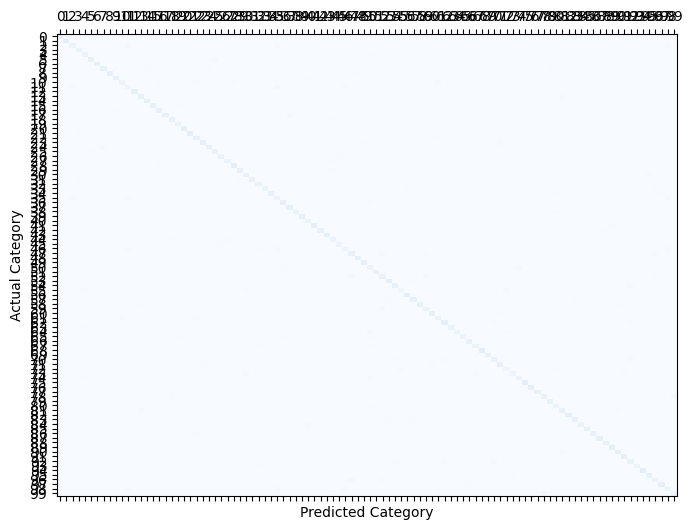

In [10]:
import matplotlib.pyplot as plt

classes = range(100)
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(100), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(100), classes)
plt.show()

Partition into approximate latent classes

In [3]:
from sas.approx_latent_classes import clip_approx
from sas.subset_dataset import SASSubsetDataset
import random 

rand_labeled_examples_indices = random.sample(range(len(cifar100)), 250)
rand_labeled_examples_labels = [cifar100[i][1] for i in rand_labeled_examples_indices]

partition = clip_approx(
    img_trainset=cifar100,
    labeled_example_indices=rand_labeled_examples_indices, 
    labeled_examples_labels=rand_labeled_examples_labels,
    num_classes=100,
    device=device
)

Load proxy model

In [4]:
from torch import nn 

class ProxyModel(nn.Module):
    def __init__(self, net, critic):
        super().__init__()
        self.net = net
        self.critic = critic
    def forward(self, x):
        return self.critic.project(self.net(x))

Determine subset

In [5]:
import torch 

net = torch.load("proxy-cifar100-resnet10-399-net.pt")
critic = torch.load("proxy-cifar100-resnet10-399-critic.pt")
proxy_model = ProxyModel(net, critic)
     
subset_dataset = SASSubsetDataset(
    dataset=cifar100,  
    subset_fraction=0.2,
    num_downstream_classes=100,
    device=device,
    proxy_model=proxy_model,
    approx_latent_class_partition=partition,
    verbose=True
)

Subset Selection:: 100%|██████████| 86/86 [00:04<00:00, 18.74it/s]

Subset Size: 10000
Discarded 40000 examples


In [6]:
len(subset_dataset)

9966

In [6]:
cnt = 0
for img,y in subset_dataset:
    cnt+=1
print(cnt)

9965


# 选完的sample list

In [7]:
sample_index = subset_dataset.subset_indices
print(len(sample_index))

9966


In [8]:
# sample_index = read_subset_dataset #假设取前500个训练数据
X_train = []
y_train = []
for i in sample_index:
    X = cifar100[i][0]
    X_train.append(X)
    y = cifar100[i][1]
    y_train.append(y)

sampled_train_data = [(X, y) for X, y in zip(X_train, y_train)] #包装为数据对
# trainDataLoader = torch.utils.data.DataLoader(sampled_train_data, batch_size=16, shuffle=True)

In [9]:
from train_changedata import main

# main(train_dataset= cifar100)
best_acc, confusion_matrix = main(train_dataset=sampled_train_data)

{'net': 'vgg16', 'gpu': True, 'b': 100, 'warm': 1, 'lr': 0.1, 'resume': False}
train_data loader is ready
Files already downloaded and verified
test_data loader is ready
Training Epoch: 1 [100/9966]	Loss: 4.6446	LR: 0.000000
Training Epoch: 1 [200/9966]	Loss: 4.6079	LR: 0.001000
Training Epoch: 1 [300/9966]	Loss: 4.6220	LR: 0.002000
Training Epoch: 1 [400/9966]	Loss: 4.6478	LR: 0.003000
Training Epoch: 1 [500/9966]	Loss: 4.5899	LR: 0.004000
Training Epoch: 1 [600/9966]	Loss: 4.6533	LR: 0.005000
Training Epoch: 1 [700/9966]	Loss: 4.6233	LR: 0.006000
Training Epoch: 1 [800/9966]	Loss: 4.6381	LR: 0.007000
Training Epoch: 1 [900/9966]	Loss: 4.6127	LR: 0.008000
Training Epoch: 1 [1000/9966]	Loss: 4.5501	LR: 0.009000
Training Epoch: 1 [1100/9966]	Loss: 4.5177	LR: 0.010000
Training Epoch: 1 [1200/9966]	Loss: 4.5888	LR: 0.011000
Training Epoch: 1 [1300/9966]	Loss: 4.5790	LR: 0.012000
Training Epoch: 1 [1400/9966]	Loss: 4.6396	LR: 0.013000
Training Epoch: 1 [1500/9966]	Loss: 4.6257	LR: 0.014000

d:\anaconda\anaconda3\envs\260d\lib\site-packages\torch\optim\lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training Epoch: 2 [100/9966]	Loss: 3.9984	LR: 0.100000
Training Epoch: 2 [200/9966]	Loss: 4.2837	LR: 0.100000
Training Epoch: 2 [300/9966]	Loss: 4.3084	LR: 0.100000
Training Epoch: 2 [400/9966]	Loss: 4.0961	LR: 0.100000
Training Epoch: 2 [500/9966]	Loss: 4.2175	LR: 0.100000
Training Epoch: 2 [600/9966]	Loss: 4.2504	LR: 0.100000
Training Epoch: 2 [700/9966]	Loss: 4.1459	LR: 0.100000
Training Epoch: 2 [800/9966]	Loss: 4.2349	LR: 0.100000
Training Epoch: 2 [900/9966]	Loss: 4.1023	LR: 0.100000
Training Epoch: 2 [1000/9966]	Loss: 4.0567	LR: 0.100000
Training Epoch: 2 [1100/9966]	Loss: 4.1390	LR: 0.100000
Training Epoch: 2 [1200/9966]	Loss: 4.0835	LR: 0.100000
Training Epoch: 2 [1300/9966]	Loss: 4.2305	LR: 0.100000
Training Epoch: 2 [1400/9966]	Loss: 4.1390	LR: 0.100000
Training Epoch: 2 [1500/9966]	Loss: 3.9316	LR: 0.100000
Training Epoch: 2 [1600/9966]	Loss: 4.1809	LR: 0.100000
Training Epoch: 2 [1700/9966]	Loss: 4.1927	LR: 0.100000
Training Epoch: 2 [1800/9966]	Loss: 4.1130	LR: 0.100000
T

In [10]:
print(best_acc)
print(confusion_matrix)

tensor(0.2908, device='cuda:0')
[[47  1  0 ...  0  0  3]
 [ 0 32  0 ...  0  0  0]
 [ 0  1 12 ...  0  4  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  2  0 ...  0 11  0]
 [ 0  0  0 ...  0  0 34]]


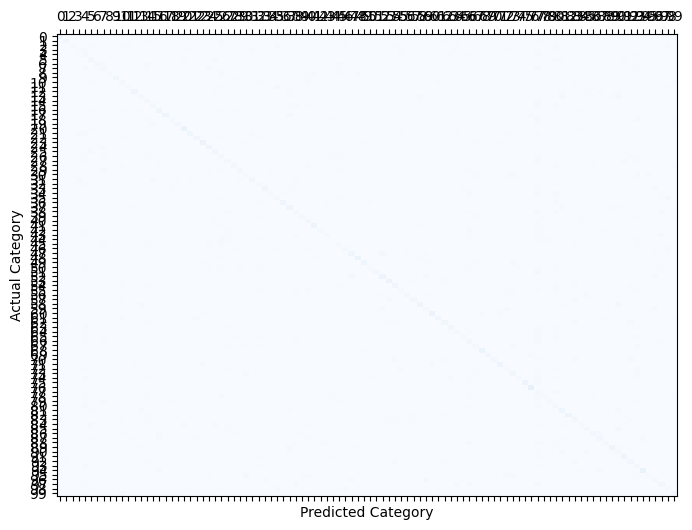

In [11]:
import matplotlib.pyplot as plt

classes = range(100)
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(100), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(100), classes)
plt.show()

# 下面测试

In [16]:
from torch.utils.data import DataLoader
cifar100_training_loader = DataLoader(
        subset_dataset, shuffle=False, num_workers=4, batch_size=100)

In [20]:
for batch_index, (images, labels) in enumerate(cifar100_training_loader):
        print(batch_index,labels)

0 tensor([81, 12, 55, 68, 74, 93, 89, 60, 77, 64, 19, 38,  9, 92, 19, 96])
1 tensor([30, 29, 38, 73, 22, 44, 63, 17, 81, 26, 52, 80, 24, 32, 62, 72])
2 tensor([46, 65, 41, 22, 98, 53, 21, 74, 75, 71, 36, 97, 41, 58,  1,  4])
3 tensor([20, 60, 37, 18, 50,  6, 89, 75, 63, 91, 56, 47,  2, 97, 34,  4])
4 tensor([74, 74, 55, 24, 74,  6, 50, 14, 89, 49, 56, 95,  9, 71, 65, 41])
5 tensor([53, 42, 47, 42, 66, 32, 58, 54, 58,  0, 84, 32, 36,  9,  0, 52])
6 tensor([69, 98, 57, 56, 82, 81, 27, 29, 63, 61, 67, 40, 41, 21, 17, 93])
7 tensor([65, 31, 99, 27, 57, 42, 52, 43, 39, 56, 55, 49, 41, 79, 98, 88])
8 tensor([73, 39, 74, 89, 37, 51, 61, 95,  3, 77, 81, 48, 48, 36, 18,  3])
9 tensor([60, 31, 75, 69, 33, 67, 13, 80, 42, 93, 29, 24, 79,  9, 87, 93])
10 tensor([67, 32, 38, 86, 78, 96, 91, 88, 98, 63, 67, 17, 39, 74, 52, 77])
11 tensor([10, 88, 32, 87, 41, 79, 27, 62, 17, 73, 44, 93,  0, 17, 57, 20])
12 tensor([91, 40, 31, 95, 26,  0, 75,  1, 76, 28,  6, 93, 51, 88, 19, 18])
13 tensor([57,  1, 47,

In [7]:
from train_changedata import main

# main(train_dataset= cifar100)
main(train_dataset=subset_dataset)

{'net': 'vgg16', 'gpu': True, 'b': 100, 'warm': 1, 'lr': 0.1, 'resume': False}
train_data loader is ready
Files already downloaded and verified
test_data loader is ready


In [13]:
count = {}
for x,y in subset_dataset:
    if y not in count:
        count[y] = 1
    else:
        count[y]+=1
print(count)

{19: 116, 15: 48, 38: 82, 88: 140, 31: 121, 34: 111, 29: 86, 66: 133, 75: 59, 55: 73, 74: 130, 45: 120, 0: 110, 53: 101, 83: 77, 57: 74, 98: 93, 11: 107, 46: 100, 35: 89, 2: 91, 6: 83, 14: 92, 7: 91, 18: 90, 1: 46, 24: 112, 73: 115, 62: 123, 79: 101, 43: 133, 42: 89, 4: 125, 97: 109, 50: 100, 44: 92, 80: 100, 64: 92, 33: 131, 90: 84, 81: 106, 85: 79, 16: 74, 86: 81, 23: 110, 22: 94, 49: 86, 71: 89, 60: 105, 12: 111, 3: 86, 39: 112, 95: 146, 25: 112, 47: 128, 52: 173, 96: 80, 59: 86, 82: 116, 17: 87, 37: 58, 8: 114, 77: 96, 72: 67, 65: 70, 84: 45, 93: 103, 27: 84, 63: 119, 69: 172, 30: 112, 91: 77, 41: 45, 67: 107, 5: 142, 21: 115, 32: 62, 78: 98, 26: 107, 51: 93, 56: 154, 36: 114, 99: 103, 70: 114, 54: 100, 92: 77, 87: 138, 94: 70, 13: 97, 20: 101, 40: 98, 58: 112, 10: 34, 61: 118, 76: 80, 89: 50, 9: 133, 28: 131, 68: 105, 48: 119}


## 已有的（需要写网络）
- 这是在完整的CIFAR100，找个模型看看在这个完整dataset上训练完模型的accuracy（直接用sk-learn，fit,evaluate，画个图/ 搭一个pytorch最简单的CNN来evaluate，倾向于第二种因为已经把dataset写好了）
- 完整数据集选了一个subset出来，我们可以找个模型看看在这个subset上训练完模型的accuracy

## 没有的（需要先inbalanced data然后用前面的网络跑）
- 我们把这个CIFAR100的进行inbalanced，使某些class多，某些class少，再次通过SAS选出subset看accuracy

## 解决方案
- solutions：upsample少的数据集，然后再用SAS选出subset看accuracy

Save subset to file

In [7]:
subset_dataset.save_to_file("./cifar100-0.2-sas-indices.pkl")

In [8]:
import pickle
F=open('./cifar100-0.2-sas-indices.pkl','rb')
read_subset_dataset = pickle.load(F)

In [9]:
len(read_subset_dataset)

9965

In [11]:
print(type(read_subset_dataset))

<class 'list'>


In [12]:
for comp in read_subset_dataset:
    print(comp)

4289
8360
49758
4074
39936
41897
18444
41699
49974
34579
17505
17741
26861
48802
12460
39853
1850
13872
40658
7574
28880
48912
22153
180
5946
19593
43920
35912
29824
30947
42182
26011
41075
22182
32371
47191
38287
12342
5979
16861
39390
40480
12989
18178
49157
10093
18633
3416
351
9590
9482
14616
22482
8975
34860
686
32415
22409
48648
30452
22587
1052
9205
12679
35765
10360
2370
25827
37317
39578
18019
49945
44231
39428
48275
1279
4136
4403
40133
19932
17904
36580
14900
40993
44765
31285
31126
19276
27247
37588
22955
46463
44561
33312
18344
31963
13126
28731
14605
33724
21376
10139
17774
44796
18772
37462
27856
6752
4737
24626
10999
2141
34813
41496
27082
20166
21220
36413
42175
24666
21301
9442
1079
27338
28416
1826
36061
20651
876
20699
29437
9
21592
23866
35910
13063
14923
15645
46019
14083
16129
42694
31421
46793
3250
16388
39878
39230
36062
31121
3225
13256
9726
32138
33404
33371
5495
711
39690
16368
1904
15839
12033
10840
10355
18030
16843
48765
32036
48024
6951
36712
24403
6328


In [14]:
sample_index = read_subset_dataset #假设取前500个训练数据
X_train = []
y_train = []
for i in sample_index:
    X = cifar100[i][0]
    X_train.append(X)
    y = cifar100[i][1]
    y_train.append(y)

sampled_train_data = [(X, y) for X, y in zip(X_train, y_train)] #包装为数据对
trainDataLoader = torch.utils.data.DataLoader(sampled_train_data, batch_size=16, shuffle=True)


In [16]:
for batch_index, (images, labels) in enumerate(trainDataLoader):
        print(batch_index,labels)

0 tensor([92, 85, 75, 42, 91, 25,  6, 81, 55, 83,  8, 32, 34,  3, 66, 38])
1 tensor([93, 15, 39, 58, 35, 78, 35, 13, 11, 23, 94, 93, 95, 20, 50, 79])
2 tensor([47, 44, 48,  9, 42, 81, 33, 91, 57, 88, 64, 20, 72, 69, 43, 34])
3 tensor([27, 34, 30, 98, 36, 25, 47, 64, 40, 88, 81, 53, 91, 87, 68, 87])
4 tensor([93, 15, 27, 68, 67, 45, 85, 32, 98, 75, 73, 82, 99, 56, 93, 23])
5 tensor([67, 24, 89,  6, 57, 47, 31, 39, 65, 99, 96, 54, 96, 77, 57, 48])
6 tensor([39, 18, 78, 45, 14, 32, 70,  0, 81, 24, 37, 40,  7, 60, 79, 58])
7 tensor([24, 44,  0, 93, 28, 58, 46, 43, 30, 49, 87, 62, 10, 59,  0,  2])
8 tensor([25, 92,  1, 54, 46, 46, 87, 41, 28, 76, 63, 60, 11, 97,  9, 64])
9 tensor([30, 15, 24, 74, 41, 88,  4,  7, 19, 37, 80, 15, 78, 57, 41, 13])
10 tensor([94, 65, 47, 20, 56, 36, 94,  9, 75, 14, 20, 55,  9, 52, 22,  1])
11 tensor([67, 27,  8, 70, 27, 67, 36, 19, 41, 54, 71, 85, 77, 31, 29, 36])
12 tensor([77, 67, 31, 45, 32, 59,  9, 62, 54, 44, 46, 92, 65, 24, 82, 90])
13 tensor([59, 27,  2,